This file contains all the functions & results we need

In [1]:
# import packages
import pandas as pd
from numpy import nan
import math
import numpy as np

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,auc,roc_curve

In [2]:
def null_modifier(df):
    '''
    Changes the values which stand for of 'Not_reported', 'Unknown, 'None' to NA
    Param:
        df: the dataframe we take care of
    Returns:
        dataframe: a new dataframe with the replaced value
    '''
    
    # read the features
    features = pd.read_excel('Features_missing.xlsx')
    data = df.copy()
    
    # Check the corresponding code of "not_reported" for each feature
    Not_reported = features[features['Not_reported'].notnull()].reset_index(drop=True)
    Not_reported = Not_reported.loc[:,['Feature','Not_reported']]
    
    # Check the corresponding code of "Unknown" for each feature
    Unknown = features[features['Unknown'].notnull()].reset_index(drop=True)
    Unknown = Unknown.loc[:,['Feature','Unknown']]
    
    # Check the corresponding code of "None" for each feature
    none = features[features['None'].notnull()].reset_index(drop=True)
    none = none.loc[:,['Feature','None']]

    # Check the corresponding code of "Not_applicable" for each feature
    Not_Applicable = features[features['Not_Applicable'].notnull()].reset_index(drop=True)
    Not_Applicable = Not_Applicable.loc[:,['Feature','Not_Applicable']]
    
    # change all the not reported number in the dataframe to NA
    for x in range(Not_reported.shape[0]):
        feature = Not_reported.iloc[x,0]
        Not_reported_number = Not_reported.iloc[x,1]
        if feature in data.columns:
            data[feature] = data[feature].replace(Not_reported_number, np.nan)
    
    # change all the Unknown number to NA
    for x in range(Unknown.shape[0]):
        feature = Unknown.iloc[x,0]
        Unknown_number = Unknown.iloc[x,1]
        if feature in data.columns:

            data[feature] = data[feature]. replace(Unknown_number, np.nan)
    
    #### change all the None number to NA
    for x in range(none.shape[0]):
        feature = none.iloc[x,0]
        none_number = none.iloc[x,1]
        if feature in data.columns:
            data[feature] = data[feature]. replace(none_number, np.nan)

    #### change all the Not Applicable number to NA
    for x in range(Not_Applicable.shape[0]):
        feature = Not_Applicable.iloc[x,0]
        Not_Applicable_number = Not_Applicable.iloc[x,1]
        if feature in data.columns:
            data[feature] = data[feature]. replace(Not_Applicable_number, np.nan)
    
    return data

In [3]:
def drop_missing_columns(df):
    '''
    Drops the columns that have too many missing values
    threshold: 0.8
    
    Params: 
        df: the dataframe we need to process
    Returns:
        dataframe: a new dataframe without features containing too many missing values
    '''
    frac = len(df) * 0.8
    data = df.dropna(thresh=frac, axis = 1)
    data = data.drop('MDAREAS', axis = 1)
    return data

In [4]:
def items (df, c):
    '''
    function to get the item list of a column which does not include nan
    Params: 
        df: the dataframe the column is in
        c: the column we get the item list from
    Returns:
        list: a list contains unique items of column c
    '''

    vals = df[c].unique().tolist()
    # if it's numerical (numbers)
    if np.issubdtype(df[c].dtype, np.number) == True:
        vals = [x for x in vals if not math.isnan(x)]
        vals.sort()
        return vals
    else:
    # if it's str
        vals = [x for x in vals if x != np.nan]
        return vals

In [5]:
def inputnumerical ():
    '''
    ask users for the list of columns which don't need to be encoded. e.g. numerical columns
    Returns:
        list
    '''
    lst = [] 
    lst = [x for x in input("Enter columns that don't need to encode (eg: AAA BBB): ").split()] 
    return lst

In [6]:
def encoding(data):
    '''
    encodes the categorical columns to numbers in the numerical order
    e.g.: if the original column contains categories 1, 5, 9, 10,
        we encode it as 0, 1, 2, 3 correspondingly
    
    Param:
        df: the dataframe that we need to encode
    Returns:
        dataframe: the dataframe that we encoded
    '''

    # ask user which (numerical) columns should be skipped in this process
    df = data.copy()
    num_cols = inputnumerical()
    print('the number of column that dont need to encoded is', len(num_cols))
    
    # iterate columns
    for column in df:
        # check if the column is numerical
        if column in num_cols:
            continue
        # encoding
        else: 
            # get the length of the list of unique values
            unique = items(df, column)
            len_unique = len(unique)
            # make a new list contains 1,2,3,4,5...
            codes = list(range(0, len_unique))
            
            # using for loop to replace the value
            for i in range(0,len_unique):
                df[column].replace(to_replace = unique[i], value = codes[i], inplace = True)
    return df

I. personal level (dependent variable: INJSEV_IM)

In [7]:
p_data = pd.read_csv('person_level_full_data.csv',index_col=0)
p_data.head()

C:\Users\ZeWu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (126,127,169) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,PTRLR1VIN,PTRLR2VIN,PTRLR3VIN,MDAREAS,MFACTOR,MDRDSTRD,MDRMANAV,DRIMPAIR,MVIOLATN,MVISOBSC
0,201800381338,4.0,56.0,208.0,208.0,1.0,9.0,4.0,4.0,0.0,...,NaN,NaN,NaN,12,0.0,0.0,4.0,0.0,0.0,0.0
1,201800381338,4.0,56.0,208.0,208.0,1.0,9.0,4.0,4.0,0.0,...,NaN,NaN,NaN,"6,12",0.0,0.0,4.0,0.0,0.0,0.0
2,201800381338,4.0,56.0,208.0,208.0,1.0,9.0,4.0,4.0,0.0,...,NaN,NaN,NaN,"6,12",0.0,0.0,0.0,0.0,0.0,0.0
3,201800381338,4.0,56.0,208.0,208.0,1.0,9.0,4.0,4.0,0.0,...,NaN,NaN,NaN,6,0.0,0.0,0.0,0.0,0.0,0.0
4,201800381366,4.0,56.0,214.0,214.0,1.0,7.0,3.0,3.0,0.0,...,NaN,NaN,NaN,"1,2,10,11,12",0.0,0.0,98.0,0.0,0.0,0.0


In [8]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134420 entries, 0 to 134419
Columns: 226 entries, CASENUM to MVISOBSC
dtypes: float64(218), int64(1), object(7)
memory usage: 232.8+ MB


    1. pre-processing

In [9]:
# replace the 'Not_reported', 'Unknown, 'None' with NA 
p_data_dropped = null_modifier(p_data)
# drop the columns have too many missing values
p_data_dropped = drop_missing_columns(p_data_dropped)
# encode
p_data_dropped = encoding(p_data_dropped)
#CASENUM PJ STARA TUM PSUSTRAT VEH_NO PER_NO STR_VEH MAKE MAK_MOD MODEL DR_ZIP VIN MCARR_I2 MCARR_ID TRLR1VIN TRLR2VIN TRLR3VIN PMODEL PMAK_MOD PVIN PMCARR_I1 PMCARR_I2 PMCARR_ID PHAZ_ID PTRLR1VIN PTRLR2VIN PTRLR3VIN HAZ_ID VE_TOTAL VE_FORMS PVH_INVL PERMVIT PERNOTMVIT NUM_INJ NUMINJ_IM WEIGHT AGE AGE_IM PBAGE NUMOCCS TRAV_SP MONTH YEAR DAY_WEEK HOUR MINUTE MOD_YEAR PMODYEAR PMONTH PHOUR PMINUTE

Enter columns that don't need to encode (eg: AAA BBB): CASENUM PJ STARA TUM PSUSTRAT VEH_NO PER_NO STR_VEH MAKE MAK_MOD MODEL DR_ZIP VIN MCARR_I2 MCARR_ID TRLR1VIN TRLR2VIN TRLR3VIN PMODEL PMAK_MOD PVIN PMCARR_I1 PMCARR_I2 PMCARR_ID PHAZ_ID PTRLR1VIN PTRLR2VIN PTRLR3VIN HAZ_ID VE_TOTAL VE_FORMS PVH_INVL PERMVIT PERNOTMVIT NUM_INJ NUMINJ_IM WEIGHT AGE AGE_IM PBAGE NUMOCCS TRAV_SP MONTH YEAR DAY_WEEK HOUR MINUTE MOD_YEAR PMODYEAR PMONTH PHOUR PMINUTE
the number of column that dont need to encoded is 52


In [10]:
# list of repeated columns
repeated_col = ['DAY_WEEK', 'HOUR', 'MINUTE', 'HARM_EV', 'MAN_COLL',
               'RELJCT2', 'LGT_COND', 'MAX_SEV', 'NUM_INJ','ALCOHOL','SEX',
               'INJ_SEV','EJECTION', 'SEAT_POS', 'AGE', 'HIT_RUN',
               'BODY_TYP', 'MOD_YEAR', 'IMPACT1', 'M_HARM', 'P_CRASH1', 'MAX_VSEV',
               'NUM_INJV', 'VEH_ALCH']

# drop the repeated columns
p_data_dropped = p_data_dropped.drop(repeated_col, axis=1)
# drop the observations that have missing values
p_data_dropped = p_data_dropped.dropna().reset_index(drop= True)
p_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62933 entries, 0 to 62932
Columns: 103 entries, CASENUM to V_ALCH_IM
dtypes: float64(99), int64(1), object(3)
memory usage: 49.5+ MB


In [11]:
# check the correlation
for column in p_data_dropped.columns:
    if column not in list(p_data_dropped.select_dtypes(include=['object']).columns):
        corr = p_data_dropped['INJSEV_IM'].corr(p_data_dropped[column])
        if corr > 0.5:
            print(column, corr)

MAXSEV_IM 0.6443326848818337
HOSPITAL 0.708403678697839
INJSEV_IM 1.0
MXVSEV_IM 0.8949680694981879
NUMINJ_IM 0.6291539704411218


In [12]:
# variables should be deleted 
#STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,PERNOTMVIT,NUM_INJ,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,CF1,CF2,CF3,EVENT1_IM,MANCOL_IM,RELJCT1_IM,RELJCT2_IM
#,NO_INJ_IM,PVE_FORMS,

In [13]:
######################################################################
######################## modeling ####################################
######################################################################

In [14]:
# define X and y
# 'INJSEV_IM' is dependent variable
y1 = p_data_dropped['INJSEV_IM']
y1 = p_data_dropped['INJSEV_IM'].replace([2,3,4,5,6],1)
# get object list
object_list = list(p_data_dropped.select_dtypes(include=['object']).columns)
# drop non-useful columns and the object columns
x1 = p_data_dropped.drop(['CASENUM','DR_ZIP','MXVSEV_IM','MAXSEV_IM','HOSPITAL','NUMINJ_IM','INJSEV_IM','STRATUM','VE_TOTAL','VE_FORMS','PVH_INVL','PERNOTMVIT','TYP_INT','EVENT1_IM','MANCOL_IM','RELJCT1_IM','RELJCT2_IM'
,'NO_INJ_IM'],axis = 1)
x1 = x1.drop(object_list, axis=1)

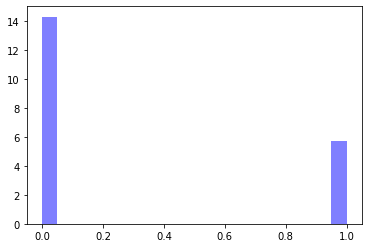

In [15]:
plt.hist(y1, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [16]:
#SMOTE -resampling
X_resample, y_resample = SMOTE().fit_sample(x1, y1)

In [17]:
#Normalized
scaler = StandardScaler()
scaler.fit(X_resample)
scaler.transform(X_resample)

array([[ 1.76835066,  0.89471948, -0.97401839, ..., -0.22547499,
        -0.57286122,  0.2152866 ],
       [ 1.76835066,  0.89471948, -0.97401839, ..., -0.22547499,
        -0.57286122,  0.2152866 ],
       [ 1.76835066,  0.89471948, -0.97401839, ..., -0.22547499,
        -0.78566448,  0.2152866 ],
       ...,
       [ 0.2917154 ,  0.12697717, -0.2562399 , ...,  1.43650599,
         1.9807779 ,  0.2152866 ],
       [ 0.2917154 ,  0.95019456, -0.80838032, ..., -0.22547499,
        -0.78566448,  0.2152866 ],
       [ 0.2917154 ,  1.48529048, -0.84079435, ..., -0.22547499,
        -0.78566448,  0.2152866 ]])

In [18]:
X_resample.shape

(90058, 82)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=42)

Decision Tree

In [20]:
dt_basic = DecisionTreeClassifier()
y_predict = dt_basic.fit(X_train, y_train).predict(X_test)

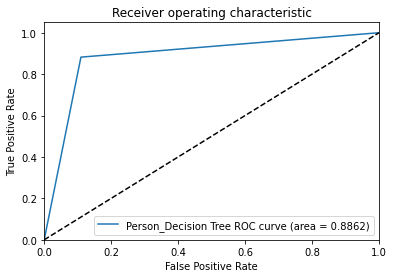

In [22]:
# Compute ROC curve and ROC area   
y_pred_proba = dt_basic.predict_proba(X_test)[:,1]
dtp_fpr, dtp_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
dtp_roc_auc = metrics.auc(dtp_fpr, dtp_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(dtp_fpr, dtp_tpr, label='Person_Decision Tree ROC curve (area = %0.4f)' % dtp_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Feature importance by decision tree


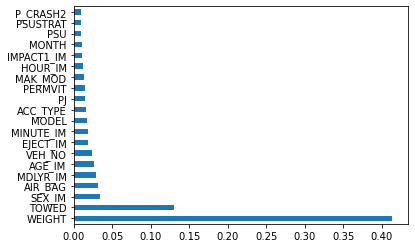

In [23]:
# feature importance
print('Feature importance by decision tree')
feat_importances = pd.Series(dt_basic.feature_importances_, index=X_resample.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.show()

In [24]:
scores = cross_val_score(dt_basic, X_resample, y_resample, cv = 10)
print('dt_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of dt_basic with CV: ', scores.mean())

dt_basic: 0.8861869864534755
Accuracy score of dt_basic with CV:  0.8331864820084778


In [25]:
print(confusion_matrix(y_test, y_predict))

[[12082  1489]
 [ 1586 11861]]


In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89     13571
         1.0       0.89      0.88      0.89     13447

    accuracy                           0.89     27018
   macro avg       0.89      0.89      0.89     27018
weighted avg       0.89      0.89      0.89     27018



Random Forest

In [28]:
rf_basic = RandomForestClassifier()
y_predict = rf_basic.fit(X_train, y_train).predict(X_test)

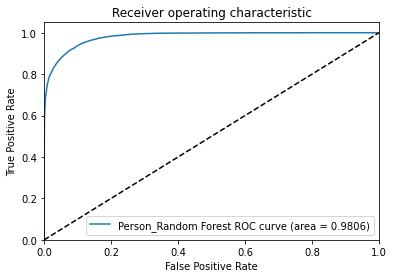

In [30]:
# Compute ROC curve and ROC area   
y_pred_proba = rf_basic.predict_proba(X_test)[:,1]
rfp_fpr, rfp_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
rfp_roc_auc = metrics.auc(rfp_fpr, rfp_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(rfp_fpr, rfp_tpr, label='Person_Random Forest ROC curve (area = %0.4f)' % rfp_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
scores = cross_val_score(rf_basic, X_resample, y_resample, cv = 10)
print('rf_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of rf_basic with CV: ', scores.mean())

rf_basic: 0.9186468280405655
Accuracy score of rf_basic with CV:  0.8641443356350871


Feature importance by Random Forest


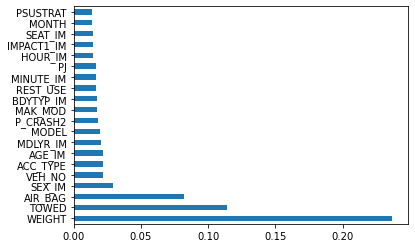

In [32]:
# feature importance
print('Feature importance by Random Forest')
feat_importances = pd.Series(rf_basic.feature_importances_, index=X_resample.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.show()

In [33]:
print(confusion_matrix(y_test, y_predict))

[[12427  1144]
 [ 1054 12393]]


In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     13571
         1.0       0.92      0.92      0.92     13447

    accuracy                           0.92     27018
   macro avg       0.92      0.92      0.92     27018
weighted avg       0.92      0.92      0.92     27018



KNN

In [35]:
knn_basic = KNeighborsClassifier()
y_predict = knn_basic.fit(X_train, y_train).predict(X_test)

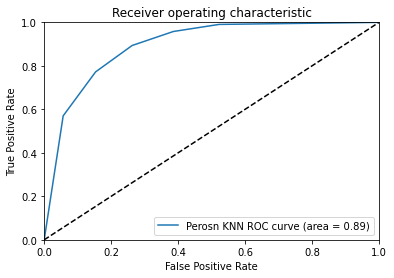

In [36]:
# Compute ROC curve and ROC area   
y_pred_proba = knn_basic.predict_proba(X_test)[:,1]
knnp_fpr, knnp_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
knnp_roc_auc = metrics.auc(knnp_fpr, knnp_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(knnp_fpr, knnp_tpr, label='Perosn KNN ROC curve (area = %0.2f)' % knnp_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
scores = cross_val_score(knn_basic, X_resample, y_resample, cv = 10)
print('knn_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of knn_basic with CV: ', scores.mean())

knn_basic: 0.8151232511658895
Accuracy score of knn_basic with CV:  0.7994073480287003


In [38]:
print(confusion_matrix(y_test, y_predict))

[[10007  3564]
 [ 1431 12016]]


In [39]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80     13571
         1.0       0.77      0.89      0.83     13447

    accuracy                           0.82     27018
   macro avg       0.82      0.82      0.81     27018
weighted avg       0.82      0.82      0.81     27018



Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr_basic = LogisticRegression()
y_predict = lr_basic.fit(X_train, y_train).predict(X_test)

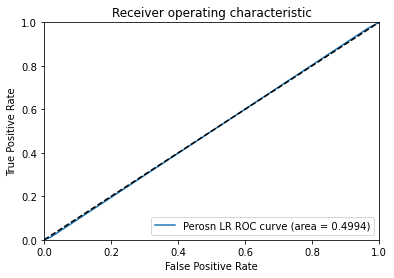

In [42]:
# Compute ROC curve and ROC area   
y_pred_proba = lr_basic.predict_proba(X_test)[:,1]
lrp_fpr, lrp_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
lrp_roc_auc = metrics.auc(lrp_fpr, lrp_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(lrp_fpr, lrp_tpr, label='Perosn LR ROC curve (area = %0.4f)' % lrp_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [43]:
scores = cross_val_score(lr_basic, X_resample, y_resample, cv = 10)
print('lr_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of lr_basic with CV: ', scores.mean())

lr_basic: 0.49770523354800505
Accuracy score of lr_basic with CV:  0.499988895058301


In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     13571
         1.0       0.50      1.00      0.66     13447

    accuracy                           0.50     27018
   macro avg       0.25      0.50      0.33     27018
weighted avg       0.25      0.50      0.33     27018



C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


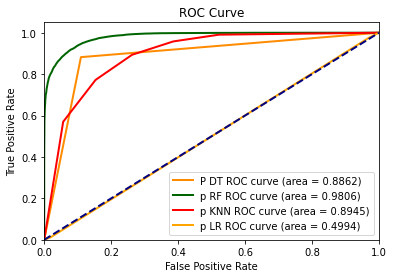

In [45]:
# merge roc_auc into one curve
plt.figure()
plt.plot(dtp_fpr, dtp_tpr, color='darkorange',
         lw=2, label='P DT ROC curve (area = %0.4f)' % dtp_roc_auc)
plt.plot(rfp_fpr, rfp_tpr, color='darkgreen',
         lw=2, label='p RF ROC curve (area = %0.4f)' % rfp_roc_auc)
plt.plot(knnp_fpr, knnp_tpr, color='red',
         lw=2, label='p KNN ROC curve (area = %0.4f)' % knnp_roc_auc)
plt.plot(lrp_fpr, lrp_tpr, color='orange',
         lw=2, label='p LR ROC curve (area = %0.4f)' % lrp_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

 Use data frame to show the resluts

In [46]:
MLA = [
    linear_model.LogisticRegressionCV(),
    naive_bayes.GaussianNB(),
    KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(),
    svm.SVC()
]

In [47]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = metrics.auc(fp, tp)
    
    row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare

C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,MLA Name,Precision,AUC
4,RandomForestClassifier,0.916926,0.919508
3,DecisionTreeClassifier,0.886808,0.886029
2,KNeighborsClassifier,0.771245,0.815482
1,GaussianNB,0.827595,0.692214
0,LogisticRegressionCV,0.497705,0.500000
5,SVC,0.497705,0.500000


II. vehicle level (dep variable: MXVSEV_IM)

In [48]:
v_data = pd.read_csv('vehicle_level_full_data.csv',index_col=0)
v_data.head()

C:\Users\ZeWu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (65,66,112,113) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,PTRLR1VIN,PTRLR2VIN,PTRLR3VIN,MDAREAS,MFACTOR,MDRDSTRD,MDRMANAV,DRIMPAIR,MVIOLATN,MVISOBSC
0,201800381338,4,56,208,208,1,9,4,4,0,...,NaN,NaN,NaN,12,0,0,4,0,0,0
1,201800381338,4,56,208,208,1,9,4,4,0,...,NaN,NaN,NaN,"6,12",0,0,4,0,0,0
2,201800381338,4,56,208,208,1,9,4,4,0,...,NaN,NaN,NaN,"6,12",0,0,0,0,0,0
3,201800381338,4,56,208,208,1,9,4,4,0,...,NaN,NaN,NaN,6,0,0,0,0,0,0
4,201800381366,4,56,214,214,1,7,3,3,0,...,NaN,NaN,NaN,"1,2,10,11,12",0,0,98,0,0,0


In [49]:
# replace the 'Not_reported', 'Unknown, 'None' with NA 
v_data_dropped = null_modifier(v_data)
# drop the columns have too many missing values
v_data_dropped = drop_missing_columns(v_data_dropped)
# encode

#CASENUM PJ STARA TUM PSUSTRAT VEH_NO PER_NO STR_VEH MAKE MAK_MOD MODEL DR_ZIP VIN MCARR_I2 MCARR_ID TRLR1VIN TRLR2VIN TRLR3VIN PMODEL PMAK_MOD PVIN PMCARR_I1 PMCARR_I2 PMCARR_ID PHAZ_ID PTRLR1VIN PTRLR2VIN PTRLR3VIN HAZ_ID VE_TOTAL VE_FORMS PVH_INVL PERMVIT PERNOTMVIT NUM_INJ NUMINJ_IM WEIGHT AGE AGE_IM PBAGE NUMOCCS TRAV_SP MONTH YEAR DAY_WEEK HOUR MINUTE MOD_YEAR PMODYEAR PMONTH PHOUR PMINUTE
v_data_dropped = encoding(v_data_dropped)

Enter columns that don't need to encode (eg: AAA BBB): CASENUM PJ STARA TUM PSUSTRAT VEH_NO PER_NO STR_VEH MAKE MAK_MOD MODEL DR_ZIP VIN MCARR_I2 MCARR_ID TRLR1VIN TRLR2VIN TRLR3VIN PMODEL PMAK_MOD PVIN PMCARR_I1 PMCARR_I2 PMCARR_ID PHAZ_ID PTRLR1VIN PTRLR2VIN PTRLR3VIN HAZ_ID VE_TOTAL VE_FORMS PVH_INVL PERMVIT PERNOTMVIT NUM_INJ NUMINJ_IM WEIGHT AGE AGE_IM PBAGE NUMOCCS TRAV_SP MONTH YEAR DAY_WEEK HOUR MINUTE MOD_YEAR PMODYEAR PMONTH PHOUR PMINUTE
the number of column that dont need to encoded is 52


In [50]:
# list of repeated columns
repeated_col = ['DAY_WEEK', 'HOUR', 'MINUTE', 'HARM_EV', 'MAN_COLL',
               'RELJCT2', 'LGT_COND', 'MAX_SEV', 'NUM_INJ','ALCOHOL',
               'HIT_RUN',
               'BODY_TYP', 'MOD_YEAR', 'IMPACT1', 'M_HARM', 'P_CRASH1', 'MAX_VSEV',
               'NUM_INJV', 'VEH_ALCH']

# drop the repeated columns
v_data_dropped = v_data_dropped.drop(repeated_col, axis=1)
# drop the observations that have missing values
v_data_dropped = v_data_dropped.dropna().reset_index(drop= True)
v_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51260 entries, 0 to 51259
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CASENUM     51260 non-null  int64  
 1   REGION      51260 non-null  int64  
 2   PSU         51260 non-null  int64  
 3   PJ          51260 non-null  int64  
 4   PSU_VAR     51260 non-null  int64  
 5   URBANICITY  51260 non-null  int64  
 6   STRATUM     51260 non-null  int64  
 7   VE_TOTAL    51260 non-null  int64  
 8   VE_FORMS    51260 non-null  int64  
 9   PVH_INVL    51260 non-null  int64  
 10  PEDS        51260 non-null  int64  
 11  PERMVIT     51260 non-null  int64  
 12  PERNOTMVIT  51260 non-null  int64  
 13  MONTH       51260 non-null  int64  
 14  YEAR        51260 non-null  int64  
 15  RELJCT1     51260 non-null  int64  
 16  TYP_INT     51260 non-null  int64  
 17  REL_ROAD    51260 non-null  int64  
 18  WEATHER1    51260 non-null  int64  
 19  WEATHER2    51260 non-nul

In [51]:
########
## 'MXVSEV_IM' is dependent variable

# check the correlation
for column in v_data_dropped.columns:
    if column not in list(v_data_dropped.select_dtypes(include=['object']).columns):
        corr = v_data_dropped['MXVSEV_IM'].corr(v_data_dropped[column])
        if corr > 0.5:
            print(column, corr)

MAXSEV_IM 0.7055549705701595
NO_INJ_IM 0.5400489349695413
MXVSEV_IM 1.0
NUMINJ_IM 0.7659486932495687


In [52]:
########
## 'MXVSEV_IM' is dependent variable

y3 = v_data_dropped['MXVSEV_IM'].replace([2,3,4,5,],1)
# get object list
object_list = list(v_data_dropped.select_dtypes(include=['object']).columns)

x3 = v_data_dropped.drop(['CASENUM','DR_ZIP','MXVSEV_IM','MAXSEV_IM','NUMINJ_IM','STRATUM','VE_TOTAL','VE_FORMS','PVH_INVL','PERNOTMVIT','TYP_INT','EVENT1_IM','MANCOL_IM','RELJCT1_IM','RELJCT2_IM','NO_INJ_IM'],axis = 1)
x3 = x3.drop(object_list, axis=1)

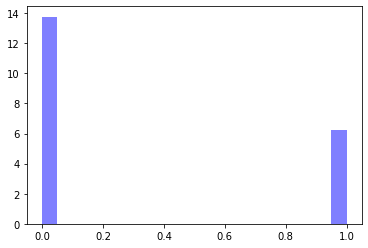

In [53]:
plt.hist(y3, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [54]:
#1.SMOTE -resampling
X3_resample, y3_resample = SMOTE().fit_sample(x3, y3)

In [55]:
#Normalized
scaler = StandardScaler()
scaler.fit(X3_resample)
scaler.transform(X3_resample)

array([[ 0.18598167,  0.00289198, -1.12050171, ...,  0.56893781,
        -0.81167887, -0.12066884],
       [ 0.18598167,  0.00289198, -1.11514769, ..., -0.67337632,
        -1.71268419, -0.12066884],
       [ 0.18598167,  0.00289198, -1.11514769, ..., -0.67337632,
         0.68999666, -0.12066884],
       ...,
       [ 0.18598167, -1.44298416, -0.797476  , ..., -0.67337632,
         0.68999666, -0.12066884],
       [ 0.18598167, -0.78029093,  1.30219114, ..., -0.67337632,
         0.68999666, -0.12066884],
       [ 0.18598167, -1.68396352, -0.78944497, ..., -0.67337632,
         0.68999666, -0.12066884]])

In [56]:
X3_resample.shape

(70536, 73)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X3_resample, y3_resample, test_size=0.3, random_state=42)

Decision Tree

In [58]:
dt_basic = DecisionTreeClassifier()
y_predict = dt_basic.fit(X_train, y_train).predict(X_test)

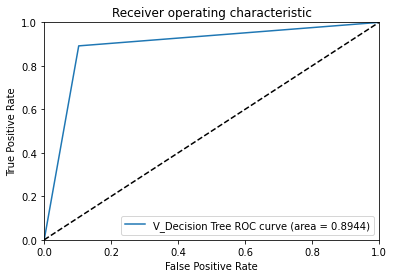

In [61]:
# Compute ROC curve and ROC area   
y_pred_proba = dt_basic.predict_proba(X_test)[:,1]
dt_fpr, dt_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
dt_roc_auc = metrics.auc(dt_fpr, dt_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(dt_fpr, dt_tpr, label='V_Decision Tree ROC curve (area = %0.4f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Feature importance by decision tree


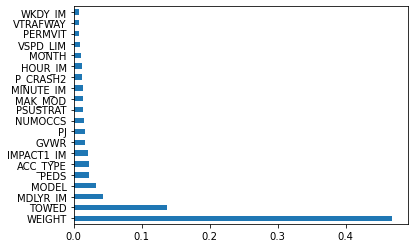

In [62]:
# feature importance
print('Feature importance by decision tree')
feat_importances = pd.Series(dt_basic.feature_importances_, index=X3_resample.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.show()

In [63]:
scores = cross_val_score(dt_basic, X3_resample, y3_resample, cv = 10)
print('dt_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of dt_basic with CV: ', scores.mean())

dt_basic: 0.8943811729124332
Accuracy score of dt_basic with CV:  0.8660570854614447


In [64]:
print(confusion_matrix(y_test, y_predict))

[[9525 1095]
 [1140 9401]]


In [65]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     10620
         1.0       0.90      0.89      0.89     10541

    accuracy                           0.89     21161
   macro avg       0.89      0.89      0.89     21161
weighted avg       0.89      0.89      0.89     21161



Random Forest

In [66]:
rf_basic = RandomForestClassifier()
y_predict = rf_basic.fit(X_train, y_train).predict(X_test)

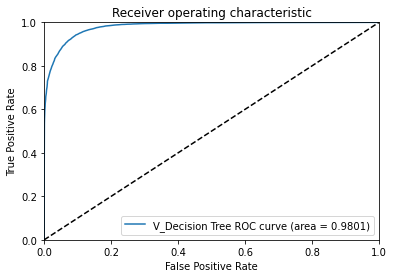

In [68]:
# Compute ROC curve and ROC area   
y_pred_proba = rf_basic.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='V_Decision Tree ROC curve (area = %0.4f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
scores = cross_val_score(rf_basic, X3_resample, y3_resample, cv = 10)
print('rf_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of rf_basic with CV: ', scores.mean())

rf_basic: 0.923160531165824
Accuracy score of rf_basic with CV:  0.8900587921714367


Feature importance by Random Forest


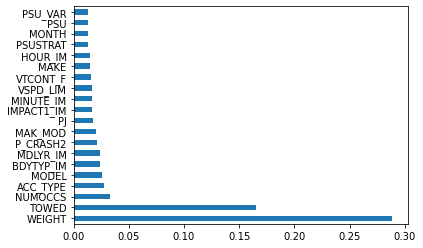

In [70]:
# feature importance
print('Feature importance by Random Forest')
feat_importances = pd.Series(rf_basic.feature_importances_, index=X3_resample.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.show()

In [71]:
print(confusion_matrix(y_test, y_predict))

[[9670  950]
 [ 676 9865]]


In [72]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     10620
         1.0       0.91      0.94      0.92     10541

    accuracy                           0.92     21161
   macro avg       0.92      0.92      0.92     21161
weighted avg       0.92      0.92      0.92     21161



KNN

In [73]:
knn_basic = KNeighborsClassifier()
y_predict = knn_basic.fit(X_train, y_train).predict(X_test)

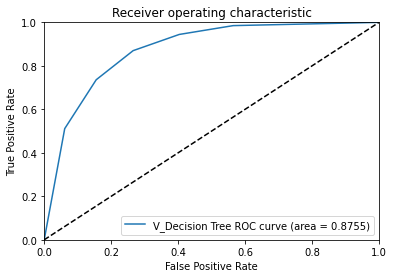

In [74]:
# Compute ROC curve and ROC area   
y_pred_proba = knn_basic.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='V_Decision Tree ROC curve (area = %0.4f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [75]:
scores = cross_val_score(knn_basic, X3_resample, y3_resample, cv = 10)
print('knn_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of knn_basic with CV: ', scores.mean())

knn_basic: 0.8018997211851991
Accuracy score of knn_basic with CV:  0.8095875808628026


In [76]:
print(confusion_matrix(y_test, y_predict))

[[7799 2821]
 [1371 9170]]


In [77]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.73      0.79     10620
         1.0       0.76      0.87      0.81     10541

    accuracy                           0.80     21161
   macro avg       0.81      0.80      0.80     21161
weighted avg       0.81      0.80      0.80     21161



SVM

In [29]:
svc_basic = svm.SVC()
y_predict = svc_basic.fit(X_train, y_train).predict(X_test)

In [ ]:
scores = cross_val_score(svc_basic, X3_resample, y3_resample, cv = 10)
print('SVC:',accuracy_score(y_test, y_predict))
print('Accuracy score of SVC with CV: ', scores.mean())

In [ ]:
print(confusion_matrix(y_test, y_predict))

Logistic Regression

In [78]:
lr_basic = LogisticRegression()
y_predict = lr_basic.fit(X_train, y_train).predict(X_test)

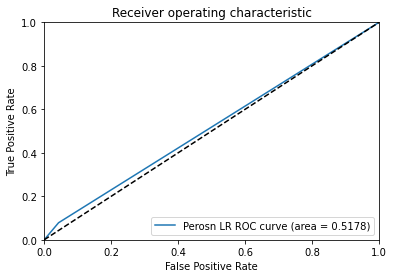

In [79]:
# Compute ROC curve and ROC area   
y_pred_proba = lr_basic.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(lr_fpr, lr_tpr, label='Perosn LR ROC curve (area = %0.4f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [80]:
scores = cross_val_score(lr_basic, X3_resample, y3_resample, cv = 10)
print('lr_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of lr_basic with CV: ', scores.mean())

lr_basic: 0.49813335853693114
Accuracy score of lr_basic with CV:  0.4999716432723663


In [81]:
print(confusion_matrix(y_test, y_predict))

[[    0 10620]
 [    0 10541]]


In [83]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     10620
         1.0       0.50      1.00      0.67     10541

    accuracy                           0.50     21161
   macro avg       0.25      0.50      0.33     21161
weighted avg       0.25      0.50      0.33     21161



C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


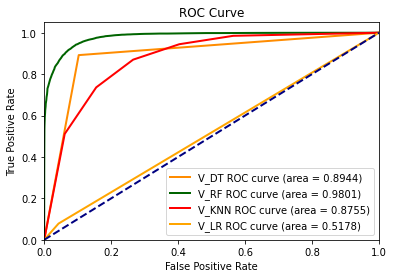

In [84]:
# merge roc_auc into one curve
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='darkorange',
         lw=2, label='V_DT ROC curve (area = %0.4f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='darkgreen',
         lw=2, label='V_RF ROC curve (area = %0.4f)' % rf_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='red',
         lw=2, label='V_KNN ROC curve (area = %0.4f)' % knn_roc_auc)
plt.plot(lr_fpr, lr_tpr, color='orange',
         lw=2, label='V_LR ROC curve (area = %0.4f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Use data frame to show the resluts

In [85]:
MLA = [
    linear_model.LogisticRegressionCV(),
    naive_bayes.GaussianNB(),
    KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(),
    svm.SVC()
]

In [86]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = metrics.auc(fp, tp)
    
    row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare

C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,MLA Name,Precision,AUC
4,RandomForestClassifier,0.910489,0.923216
3,DecisionTreeClassifier,0.896870,0.896123
2,KNeighborsClassifier,0.764740,0.802153
1,GaussianNB,0.801076,0.781974
0,LogisticRegressionCV,0.519694,0.523437
5,SVC,0.498133,0.500000


In [87]:
########
## 'MAXSEV_IM' is dependent variable
y4 = v_data_dropped['MAXSEV_IM'].replace([2,3,4,5,6],1)
# get object list
object_list = list(v_data_dropped.select_dtypes(include=['object']).columns)

x4 = v_data_dropped.drop(['CASENUM','DR_ZIP','MXVSEV_IM','MAXSEV_IM','NUMINJ_IM','STRATUM','VE_TOTAL','VE_FORMS','PVH_INVL','PERNOTMVIT','TYP_INT','EVENT1_IM','MANCOL_IM','RELJCT1_IM','RELJCT2_IM','NO_INJ_IM'],axis = 1)
x4 = x4.drop(object_list, axis=1)

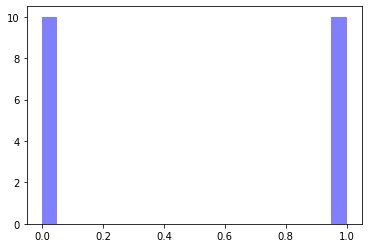

In [88]:
plt.hist(y4, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [89]:
#Normalized
scaler = StandardScaler()
scaler.fit(x4)
scaler.transform(x4)

array([[ 1.69223659e-01,  9.08336693e-03, -1.11060914e+00, ...,
         5.38825365e-01, -7.92499284e-01, -1.22271195e-01],
       [ 1.69223659e-01,  9.08336693e-03, -1.10520790e+00, ...,
        -6.64605750e-01, -1.66191637e+00, -1.22271195e-01],
       [ 1.69223659e-01,  9.08336693e-03, -1.10520790e+00, ...,
        -6.64605750e-01,  6.56529191e-01, -1.22271195e-01],
       ...,
       [ 1.66506859e+00,  7.18499398e-01, -9.55773629e-01, ...,
        -5.44262638e-01, -1.66191637e+00, -1.22271195e-01],
       [ 1.66506859e+00,  7.18499398e-01, -9.55773629e-01, ...,
        -6.64605750e-01, -1.66191637e+00, -1.22271195e-01],
       [ 1.66506859e+00,  7.18499398e-01, -9.55773629e-01, ...,
         1.50157026e+00,  6.56529191e-01,  1.08651226e+01]])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

Decision Tree

In [91]:
dt_basic = DecisionTreeClassifier()
y_predict = dt_basic.fit(X_train, y_train).predict(X_test)

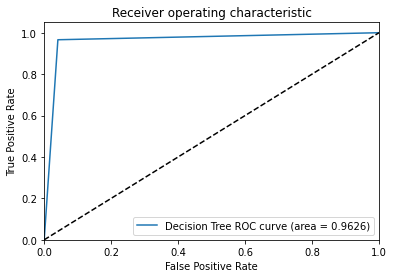

In [92]:
# Compute ROC curve and ROC area   
y_pred_proba = dt_basic.predict_proba(X_test)[:,1]
dt1_fpr, dt1_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
dt1_roc_auc = metrics.auc(dt1_fpr, dt1_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(dt1_fpr, dt1_tpr, label='Decision Tree ROC curve (area = %0.4f)' % dt1_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Feature importance by decision tree


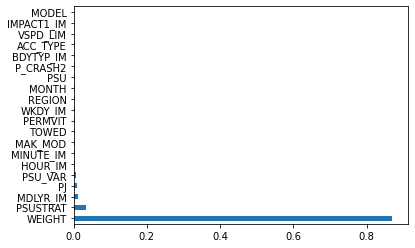

In [93]:
# feature importance
print('Feature importance by decision tree')
feat_importances = pd.Series(dt_basic.feature_importances_, index=x4.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.show()

In [94]:
scores = cross_val_score(dt_basic, x4, y4, cv = 10)
print('dt_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of dt_basic with CV: ', scores.mean())

dt_basic: 0.9626089218363897
Accuracy score of dt_basic with CV:  0.955598907530238


In [95]:
print(confusion_matrix(y_test, y_predict))

[[7320  312]
 [ 263 7483]]


In [96]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7632
           1       0.96      0.97      0.96      7746

    accuracy                           0.96     15378
   macro avg       0.96      0.96      0.96     15378
weighted avg       0.96      0.96      0.96     15378



Random Forest

In [97]:
rf_basic = RandomForestClassifier()
y_predict = rf_basic.fit(X_train, y_train).predict(X_test)

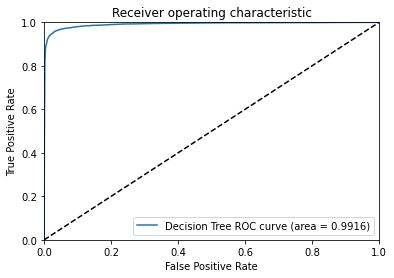

In [99]:
# Compute ROC curve and ROC area   
y_pred_proba = rf_basic.predict_proba(X_test)[:,1]
rf1_fpr, rf1_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
rf1_roc_auc = metrics.auc(rf1_fpr, rf1_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(rf1_fpr, rf1_tpr, label='Decision Tree ROC curve (area = %0.4f)' % rf1_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [100]:
scores = cross_val_score(rf_basic, x4, y4, cv = 10)
print('rf_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of rf_basic with CV: ', scores.mean())

rf_basic: 0.9629990896085316
Accuracy score of rf_basic with CV:  0.9596371439719078


Feature importance by Random Forest


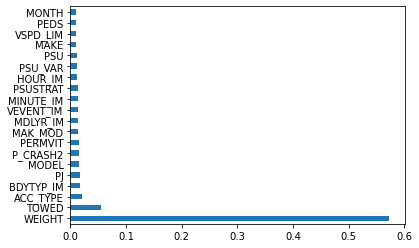

In [101]:
# feature importance
print('Feature importance by Random Forest')
feat_importances = pd.Series(rf_basic.feature_importances_, index=x4.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.show()

In [102]:
print(confusion_matrix(y_test, y_predict))

[[7368  264]
 [ 305 7441]]


In [103]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7632
           1       0.97      0.96      0.96      7746

    accuracy                           0.96     15378
   macro avg       0.96      0.96      0.96     15378
weighted avg       0.96      0.96      0.96     15378



KNN

In [104]:
knn_basic = KNeighborsClassifier()
y_predict = knn_basic.fit(X_train, y_train).predict(X_test)

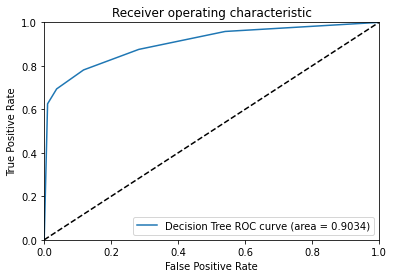

In [106]:
# Compute ROC curve and ROC area   
y_pred_proba = knn_basic.predict_proba(X_test)[:,1]
knn1_fpr, knn1_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
knn1_roc_auc = metrics.auc(knn1_fpr, knn1_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(knn1_fpr, knn1_tpr, label='Decision Tree ROC curve (area = %0.4f)' % knn1_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [107]:
scores = cross_val_score(knn_basic, x4, y4, cv = 10)
print('knn_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of knn_basic with CV: ', scores.mean())

knn_basic: 0.8314475224346469
Accuracy score of knn_basic with CV:  0.8299648849005073


In [108]:
print(confusion_matrix(y_test, y_predict))

[[6735  897]
 [1695 6051]]


In [109]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      7632
           1       0.87      0.78      0.82      7746

    accuracy                           0.83     15378
   macro avg       0.83      0.83      0.83     15378
weighted avg       0.84      0.83      0.83     15378



SVM

In [ ]:
svc_basic = svm.SVC()
y_predict = svc_basic.fit(X_train, y_train).predict(X_test)

In [ ]:
scores = cross_val_score(svc_basic, x4, y4, cv = 10)
print('SVC:',accuracy_score(y_test, y_predict))
print('Accuracy score of SVC with CV: ', scores.mean())

In [ ]:
print(confusion_matrix(y_test, y_predict))

Logistic Regression

In [110]:
lr_basic = LogisticRegression()
y_predict = lr_basic.fit(X_train, y_train).predict(X_test)

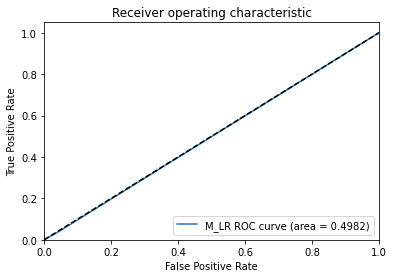

In [111]:
# Compute ROC curve and ROC area   
y_pred_proba = lr_basic.predict_proba(X_test)[:,1]
lr1_fpr, lr1_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
lr1_roc_auc = metrics.auc(lr1_fpr, lr1_tpr)


# Plot of a ROC curve 
plt.figure()
plt.plot(lr1_fpr, lr1_tpr, label='M_LR ROC curve (area = %0.4f)' % lr1_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [112]:
scores = cross_val_score(lr_basic, x4, y4, cv = 10)
print('lr_basic:',accuracy_score(y_test, y_predict))
print('Accuracy score of lr_basic with CV: ', scores.mean())

lr_basic: 0.4962934061646508
Accuracy score of lr_basic with CV:  0.5002536090518923


In [113]:
print(confusion_matrix(y_test, y_predict))

[[7632    0]
 [7746    0]]


In [114]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      7632
           1       0.00      0.00      0.00      7746

    accuracy                           0.50     15378
   macro avg       0.25      0.50      0.33     15378
weighted avg       0.25      0.50      0.33     15378



C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


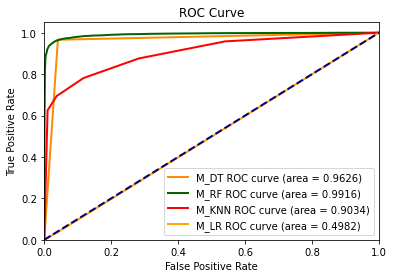

In [115]:
# merge roc_auc into one curve
plt.figure()
plt.plot(dt1_fpr, dt1_tpr, color='darkorange',
         lw=2, label='M_DT ROC curve (area = %0.4f)' % dt1_roc_auc)
plt.plot(rf1_fpr, rf1_tpr, color='darkgreen',
         lw=2, label='M_RF ROC curve (area = %0.4f)' % rf1_roc_auc)
plt.plot(knn1_fpr, knn1_tpr, color='red',
         lw=2, label='M_KNN ROC curve (area = %0.4f)' % knn1_roc_auc)
plt.plot(lr1_fpr, lr1_tpr, color='orange',
         lw=2, label='M_LR ROC curve (area = %0.4f)' % lr1_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Use dataframe to show results

In [116]:
MLA = [
    linear_model.LogisticRegressionCV(),
    naive_bayes.GaussianNB(),
    KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(n_estimators=100),
    svm.SVC()
]

In [117]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = metrics.auc(fp, tp)
    
    row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare

C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ZeWu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,MLA Name,Precision,AUC
4,RandomForestClassifier,0.967780,0.962710
3,DecisionTreeClassifier,0.958515,0.961991
1,GaussianNB,0.959159,0.840853
2,KNeighborsClassifier,0.870898,0.831823
0,LogisticRegressionCV,0.513337,0.508453
5,SVC,0.000000,0.500000
